In [126]:
import pandas as pd

In [127]:
df = pd.read_csv('news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [128]:
df.drop(['Unnamed: 0','title'],axis=1,inplace = True)

In [129]:
df

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL
...,...,...
6330,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [130]:
# EDA

In [131]:
df['word count'] = df['text'].apply(lambda x: len(x.split()))

In [132]:
df

,text,label,word count
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1296
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,446
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,431
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,404
4,It's primary day in New York and front-runners...,REAL,317
...,...,...,...
6330,The State Department told the Republican Natio...,REAL,642
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,2183
6332,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,1947
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",REAL,1120


In [133]:
df.describe()

,word count
count,6335.000000
mean,776.300710
std,854.333358
min,0.000000
25%,289.000000
50%,597.000000
75%,1024.000000
max,20891.000000


In [134]:
divisions = ['0-200','201-400','401-600','601-800','801-1000','1001-1200','1201-1400','1401-1600','1601-1800','1801-2000','Above 2000']
def division(num):
    if(num<=200 and num >=0):
        return divisions[0]
    elif(num<=400 and num >=201):
        return divisions[1]
    elif(num<=600 and num >=401):
        return divisions[2]
    elif(num<=800 and num >=601):
        return divisions[3]
    elif(num<=1000 and num >=801):
        return divisions[4]
    elif(num<=1200 and num >=1001):
        return divisions[5]
    elif(num<=1400 and num >1201):
        return divisions[6]
    elif(num<=1600 and num >1401):
        return divisions[7]
    elif(num<=1800 and num >1601):
        return divisions[7]
    elif(num<=2000 and num >1801):
        return divisions[9]
    else :
        return divisions[10]
    

In [135]:
df['word count division'] = df['word count'].apply(division )

In [136]:
df

,text,label,word count,word count division
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1296,1201-1400
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,446,401-600
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,431,401-600
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,404,401-600
4,It's primary day in New York and front-runners...,REAL,317,201-400
...,...,...,...,...
6330,The State Department told the Republican Natio...,REAL,642,601-800
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,2183,Above 2000
6332,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,1947,1801-2000
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",REAL,1120,1001-1200


In [138]:
df['word count division'] = pd.Categorical(df['word count division'],
                                   categories=divisions,
                                   ordered=True)

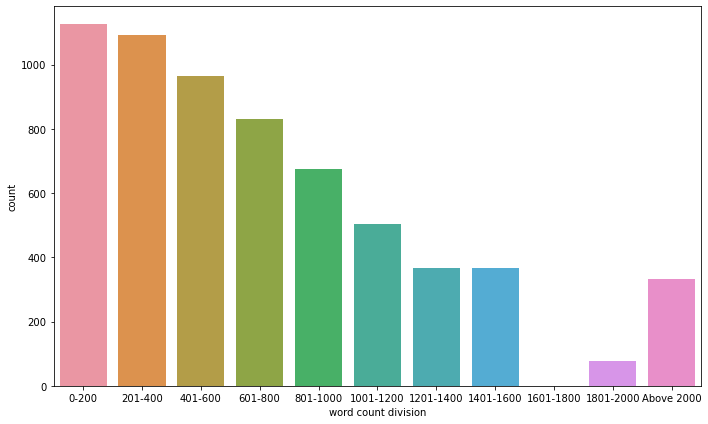

In [139]:
plt.figure(figsize=(10,6))
sns.countplot(x='word count division',data= df)
plt.tight_layout()

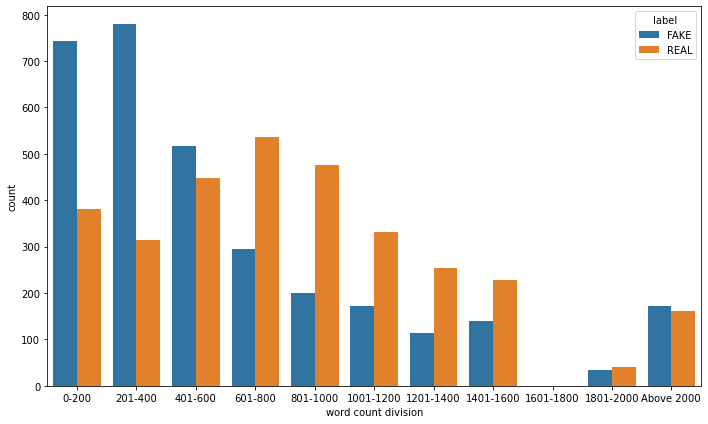

In [141]:
plt.figure(figsize=(10,6))
sns.countplot(x='word count division',data= df,hue='label')
plt.tight_layout()

In [144]:
# I want to find out whether word count is a good enough feature to feed into my model
# I want to find out whether there is a correlation between an article being fake and its word count being large or small

In [152]:
# since there are more no of fake articles for smaller word counts than larger word counts, word count seems like a good feature to feed to the model.

In [153]:
df = df[df['word count'] >0]

In [154]:
df

,text,label,word count,word count division
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1296,1201-1400
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,446,401-600
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,431,401-600
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,404,401-600
4,It's primary day in New York and front-runners...,REAL,317,201-400
...,...,...,...,...
6330,The State Department told the Republican Natio...,REAL,642,601-800
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,2183,Above 2000
6332,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,1947,1801-2000
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",REAL,1120,1001-1200


In [155]:
df = df[df['word count'] <=3000]

In [156]:
df

,text,label,word count,word count division
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1296,1201-1400
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,446,401-600
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,431,401-600
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,404,401-600
4,It's primary day in New York and front-runners...,REAL,317,201-400
...,...,...,...,...
6330,The State Department told the Republican Natio...,REAL,642,601-800
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,2183,Above 2000
6332,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,1947,1801-2000
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",REAL,1120,1001-1200


In [157]:
df.describe()

,word count
count,6171.000000
mean,700.498461
std,545.881460
min,1.000000
25%,288.000000
50%,587.000000
75%,991.500000
max,2994.000000


In [158]:
# the news article must have 100 -3000 words

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [174]:
X = df.drop(['label','word count division'],axis=1)

In [175]:
X

,text,word count
0,"Daniel Greenfield, a Shillman Journalism Fello...",1296
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,446
2,U.S. Secretary of State John F. Kerry said Mon...,431
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",404
4,It's primary day in New York and front-runners...,317
...,...,...
6330,The State Department told the Republican Natio...,642
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,2183
6332,Anti-Trump Protesters Are Tools of the Oligar...,1947
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",1120


In [176]:
y = df.drop(['text','word count','word count division'],axis=1)

In [177]:
y

,label
0,FAKE
1,FAKE
2,REAL
3,FAKE
4,REAL
...,...
6330,REAL
6331,FAKE
6332,FAKE
6333,REAL


In [178]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
y_train

,label
5704,REAL
2348,REAL
2770,FAKE
4600,REAL
3378,REAL
...,...
5062,FAKE
3346,REAL
1697,REAL
2670,REAL


In [179]:
X_train

,text,word count
5704,Principal Krystal Hardy has dedicated herself ...,1296
2348,Ted Cruz is daring Donald Trump to sue him ove...,493
2770,Getty - Timothy A. Clary \nBritish actress Emm...,819
4600,"Olive Branch, Mississippi (CNN) Ted Cruz gushe...",1100
3378,SAN FRANCISCO — Hillary Clinton's campaign acc...,993
...,...,...
5062,Print \nRepublican National Committee spokesma...,142
3346,"Killing Obama administration rules, dismantlin...",17
1697,Empty bleachers and a hostile student body gre...,752
2670,"(CNN) ""My son served in the army for four year...",1035


In [180]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.8)
tfid_x_train = tfvect.fit_transform(X_train)
tfid_x_test = tfvect.transform(X_test)

In [56]:
classifier = PassiveAggressiveClassifier(max_iter=50)
classifier.fit(tfid_x_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [57]:
y_pred = classifier.predict(tfid_x_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.76%


In [21]:
cf = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(cf)

[[572  43]
 [ 41 611]]


In [22]:
def fake_news_det(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = classifier.predict(vectorized_input_data)
    print(prediction)

In [23]:
fake_news_det('U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.')

['REAL']


In [24]:
fake_news_det("""Go to Article 
President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years. The only problem with stumping for Hillary Clinton, however, is sheâ€™s not exactly a candidate easy to get too enthused about.  """)

['FAKE']


In [25]:
import pickle
pickle.dump(classifier,open('model.pkl', 'wb'))

In [26]:
# load the model from disk
loaded_model = pickle.load(open('model.pkl', 'rb'))

In [27]:
def fake_news_det1(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    print(prediction)

In [28]:
fake_news_det1("""Go to Article 
President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years. The only problem with stumping for Hillary Clinton, however, is sheâ€™s not exactly a candidate easy to get too enthused about.  """)

['FAKE']


In [29]:
fake_news_det1("""U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.""")

['REAL']


In [30]:
fake_news_det('''U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.''')

['REAL']
